# Importing Packages and Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_scripts():
    df1 = pd.read_csv('../data/simpsons_script_lines.csv', error_bad_lines=False)\
        .sort_values(['episode_id', 'timestamp_in_ms'])\
        .reset_index()
    
    df2 = pd.read_csv('../data/simpsons_episodes.csv', error_bad_lines=False)[['id', 'season','imdb_rating']]
    df2.columns = ['episode_id', 'season','imdb_rating']

    df3 = pd.merge(df1, df2, how='left', on='episode_id')
    
    return df3


def get_top_loc(df, n_characters):
    # get top characters by line count
    cts = df.raw_location_text.value_counts()
    top = list(cts[:n_characters].index)
    return top



In [3]:
df = load_scripts()

b'Skipping line 8084: expected 13 fields, saw 20\nSkipping line 52607: expected 13 fields, saw 21\nSkipping line 59910: expected 13 fields, saw 21\n'
b'Skipping line 71801: expected 13 fields, saw 20\nSkipping line 73539: expected 13 fields, saw 21\nSkipping line 77230: expected 13 fields, saw 21\nSkipping line 78953: expected 13 fields, saw 21\nSkipping line 81138: expected 13 fields, saw 20\nSkipping line 86746: expected 13 fields, saw 22\nSkipping line 101154: expected 13 fields, saw 21\nSkipping line 115438: expected 13 fields, saw 20\nSkipping line 117573: expected 13 fields, saw 22\nSkipping line 130610: expected 13 fields, saw 22\n'
b'Skipping line 152970: expected 13 fields, saw 22\nSkipping line 153017: expected 13 fields, saw 20\nSkipping line 153018: expected 13 fields, saw 30\nSkipping line 154080: expected 13 fields, saw 20\nSkipping line 154082: expected 13 fields, saw 20\nSkipping line 154084: expected 13 fields, saw 20\nSkipping line 154086: expected 13 fields, saw 20\n

## Data Cleaning and Checking

Upon inspection of the line numbers listed within the csv file, it appears that some lines of dialogue have run into one another. There were a total of 27 lines within the data which had more than 13 columns within the data. I deleted these columns, potentially losing 54 lines of dialogue. Since this accounts for around 0.036% of the data, I was happy to lose it.

In [4]:
def load_scripts_ed():
        # original data file had 27 rows in  the csv file where data was compromised. 
        # Data for different lines appears to have been mixed up, meaning 54 entries were lost (0.036% of the data)
        # I deleted the rows 
    df1 = pd.read_csv('../data/simpsons_script_lines_ed.csv', error_bad_lines=False)\
        .sort_values(['episode_id', 'timestamp_in_ms'])\
        .reset_index()
    
    df2 = pd.read_csv('../data/simpsons_episodes.csv', error_bad_lines=False)[['id', 'season','imdb_rating']]
    df2.columns = ['episode_id', 'season','imdb_rating']

    df3 = pd.merge(df1, df2, how='left', on='episode_id')
    
    return df3


def get_top(df, n_characters):
    # get top characters by line count
    cts = df.raw_character_text.value_counts()
    top = list(cts[:n_characters].index)
    return top

def get_top_id(df, n_characters):
    # get top characters by line count
    cts = df.character_id.value_counts()
    top = list(cts[:n_characters].index)
    return top


In [5]:
#The data is reloaded from  .csv file where the rows of corrupt data were removed
df = load_scripts_ed()

In [6]:
print(df.shape)
df.head()

(158248, 16)


,index,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count,season,imdb_rating
0,148751,4,1,3,Homer Simpson: There's no time to be careful.,10000,TRUE,2,2.0,Homer Simpson,Car,There's no time to be careful.,theres no time to be careful,6.0,1,8.2
1,148752,5,1,4,Homer Simpson: We're late.,10000,TRUE,2,2.0,Homer Simpson,Car,We're late.,were late,2.0,1,8.2
2,149014,263,1,262,Homer Simpson: Who's Tiny Tim?,1001000,TRUE,2,19.0,Homer Simpson,PERSONNEL OFFICE,Who's Tiny Tim?,whos tiny tim,3.0,1,8.2
3,149015,264,1,263,(Simpson Home: int. simpson house - night),1006000,FALSE,NaN,5.0,NaN,Simpson Home,NaN,NaN,NaN,1,8.2
4,149016,265,1,264,"Bubbles: (FROM TV) Hey, Moldy, do you think Sa...",1006000,TRUE,29,5.0,Bubbles,Simpson Home,"Hey, Moldy, do you think Santa will be able to...",hey moldy do you think santa will be able to f...,17.0,1,8.2


In [7]:
df.describe(include = 'all')

,index,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count,season,imdb_rating
count,158248.000000,158248.000000,158248.000000,158248.000000,158248,158248.0,158248,140727.0,157841.000000,140726,157840,132089,132064,132089.000000,158248.000000,158248.000000
unique,NaN,NaN,NaN,NaN,148257,2704.0,5,7183.0,NaN,6763,4497,121955,119733,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,Homer Simpson: (ANNOYED GRUNT),1315000.0,True,2.0,NaN,Homer Simpson,Simpson Home,No.,no,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,219,574.0,109028,24712.0,NaN,29839,35056,305,426,NaN,NaN,NaN
mean,79123.500000,79166.825521,278.465453,141.523084,NaN,NaN,NaN,NaN,846.336142,NaN,NaN,NaN,NaN,9.887175,13.104557,7.436313
std,45682.407037,45697.771675,163.412851,83.816881,NaN,NaN,NaN,NaN,1206.870862,NaN,NaN,NaN,NaN,8.055425,7.292986,0.719738
min,0.000000,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,1.000000,4.500000
25%,39561.750000,39592.750000,138.000000,70.000000,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,4.000000,7.000000,6.900000
50%,79123.500000,79160.500000,274.000000,140.000000,NaN,NaN,NaN,NaN,194.000000,NaN,NaN,NaN,NaN,8.000000,13.000000,7.300000
75%,118685.250000,118741.250000,418.000000,210.000000,NaN,NaN,NaN,NaN,1358.000000,NaN,NaN,NaN,NaN,13.000000,19.000000,8.000000


In [8]:
df.raw_location_text.value_counts(normalize = True)

Simpson Home                       0.222098
Springfield Elementary School      0.044932
Moe's Tavern                       0.029308
Springfield Nuclear Power Plant    0.022764
Kwik-E-Mart                        0.009351
                                     ...   
Art Auction House                  0.000006
Cabin 12                           0.000006
Burns's Plantation                 0.000006
FRONT LAWN                         0.000006
ROW OF SHOPS                       0.000006
Name: raw_location_text, Length: 4497, dtype: float64

A quick look at df.describe() for all columns highlights the following:
- The most common line in the scripts is "Homer Simpson: (ANNOYED GRUNT)" which occurs 219 times, d'oh!
- The character with the most lines is Homer Simpson
- The location where most lines are spoken is the Simpson's home
- The most common line spoken (by more than one character) is 'no' (426 times)
- Over 25% of lines are spoken in one of 5 locations (Simpson Home 22%, Springfield Elementary School 4.5%, Moe's Tavern 3% Springfield Nuclear Power Plant 2%, Kwik-E-Mart 1%)

The description summary above showed that 'speaking_line' column had 5 different possible values, however, this column should be True or False.

In [9]:
print(df.speaking_line.dtypes)

object


In [10]:
print (df.speaking_line.unique())

['TRUE' 'FALSE' True False 'Guess what. I also play Frankenstein!']


We want this column to be a Boolean, but we have three possible text values, 'TRUE', 'FALSE' and 'Guess what. I also play Frankenstein!'


In [11]:
#raw_text column shows that Abraham Lincoln is the character that spoke this line
pd.DataFrame(df.query("character_id == 'guess what i also play frankenstein'"))

,index,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count,season,imdb_rating
152655,142011,152461,546,20,ABRAHAM LINCOLN: (FURIOUS) Guess what. I also ...,Springfield Elementary School,Guess what. I also play Frankenstein!,guess what i also play frankenstein,6.0,NaN,NaN,NaN,NaN,NaN,25,6.9


In [12]:
#'Abraham Lincoln' has character ID 857
pd.DataFrame(df.query("raw_character_text == 'Abraham Lincoln'"))

,index,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count,season,imdb_rating
18449,8895,18480,62,92,"Abraham Lincoln: Mmm, hmm.",434000,True,857.0,25.0,Abraham Lincoln,Simpson Living Room,"Mmm, hmm.",mmm hmm,2.0,4,9.0
21468,11900,21500,72,210,Abraham Lincoln: Four score and seven years ag...,950000,True,857.0,772.0,Abraham Lincoln,BEER HALL OF THE PRESIDENTS,"Four score and seven years ago, we took the fi...",four score and seven years ago we took the fin...,19.0,4,8.0
21469,11901,21501,72,211,Abraham Lincoln: Ahhh. (SEGUES INTO RAP) BOOM-...,960000,True,857.0,772.0,Abraham Lincoln,BEER HALL OF THE PRESIDENTS,Ahhh. BOOM-CHA-CHA-BOOM. I'M RAPPIN' ABIE AND ...,ahhh boom-cha-cha-boom im rappin abie and im h...,25.0,4,8.0
29537,19903,29568,101,11,"Abraham Lincoln: (NODS PLEASANTLY) Hello, Bart.",115000,True,857.0,1049.0,Abraham Lincoln,Prison Bus,"Hello, Bart.",hello bart,2.0,5,8.2
46783,36981,46816,165,245,Abraham Lincoln: (MENACINGLY) It's showtime!,1168000,True,857.0,1557.0,Abraham Lincoln,Buried Cabin,It's showtime!,its showtime,2.0,8,8.6
92073,82155,92125,319,206,"Abraham Lincoln: Thank you, Homer. (SHAKES HOM...",888000,True,857.0,541.0,Abraham Lincoln,The Gilded Truffle Restaurant,"Thank you, Homer.",thank you homer,3.0,15,6.6
127814,117668,127877,454,260,Abraham Lincoln: May I be of assistance?,1143000,True,857.0,186.0,Abraham Lincoln,Country Road,May I be of assistance?,may i be of assistance,5.0,21,6.6
127816,117670,127879,454,262,Abraham Lincoln: Perhaps this hat will help di...,1145000,True,857.0,186.0,Abraham Lincoln,Country Road,Perhaps this hat will help disguise your hair.,perhaps this hat will help disguise your hair,8.0,21,6.6
127818,117672,127881,454,264,Abraham Lincoln: It makes you look like a potb...,1155000,True,857.0,186.0,Abraham Lincoln,Country Road,It makes you look like a potbellied stove.,it makes you look like a potbellied stove,8.0,21,6.6
127820,117674,127883,454,266,"Abraham Lincoln: (OFF HER ANNOYED LOOK) Hey, h...",1155000,True,857.0,186.0,Abraham Lincoln,Country Road,"Hey, hey, ""Honest Abe."" Oh, I'm a riot.",hey hey honest abe oh im a riot,8.0,21,6.6


In [13]:
#Updates the row with text 'guess what i also play frankenstein' with correct 'raw_character_text', 
#'character_id and 'speaking_line'
df.at[152655,'character_id']=857
df.at[152655,'raw_character_text']='Abraham Lincoln'
df.at[152655,'speaking_line']=True
df.at[152655,'spoken_words']='Guess what. I also play Frankenstein!'
df.at[152655,'normalized_text']='guess what i also play frankenstein'
df.at[152655,'word_count']=6
pd.DataFrame(df.query("character_id == 857"))

,index,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count,season,imdb_rating
18449,8895,18480,62,92,"Abraham Lincoln: Mmm, hmm.",434000,True,857.0,25.0,Abraham Lincoln,Simpson Living Room,"Mmm, hmm.",mmm hmm,2.0,4,9.0
21468,11900,21500,72,210,Abraham Lincoln: Four score and seven years ag...,950000,True,857.0,772.0,Abraham Lincoln,BEER HALL OF THE PRESIDENTS,"Four score and seven years ago, we took the fi...",four score and seven years ago we took the fin...,19.0,4,8.0
21469,11901,21501,72,211,Abraham Lincoln: Ahhh. (SEGUES INTO RAP) BOOM-...,960000,True,857.0,772.0,Abraham Lincoln,BEER HALL OF THE PRESIDENTS,Ahhh. BOOM-CHA-CHA-BOOM. I'M RAPPIN' ABIE AND ...,ahhh boom-cha-cha-boom im rappin abie and im h...,25.0,4,8.0
29537,19903,29568,101,11,"Abraham Lincoln: (NODS PLEASANTLY) Hello, Bart.",115000,True,857.0,1049.0,Abraham Lincoln,Prison Bus,"Hello, Bart.",hello bart,2.0,5,8.2
46783,36981,46816,165,245,Abraham Lincoln: (MENACINGLY) It's showtime!,1168000,True,857.0,1557.0,Abraham Lincoln,Buried Cabin,It's showtime!,its showtime,2.0,8,8.6
92073,82155,92125,319,206,"Abraham Lincoln: Thank you, Homer. (SHAKES HOM...",888000,True,857.0,541.0,Abraham Lincoln,The Gilded Truffle Restaurant,"Thank you, Homer.",thank you homer,3.0,15,6.6
127814,117668,127877,454,260,Abraham Lincoln: May I be of assistance?,1143000,True,857.0,186.0,Abraham Lincoln,Country Road,May I be of assistance?,may i be of assistance,5.0,21,6.6
127816,117670,127879,454,262,Abraham Lincoln: Perhaps this hat will help di...,1145000,True,857.0,186.0,Abraham Lincoln,Country Road,Perhaps this hat will help disguise your hair.,perhaps this hat will help disguise your hair,8.0,21,6.6
127818,117672,127881,454,264,Abraham Lincoln: It makes you look like a potb...,1155000,True,857.0,186.0,Abraham Lincoln,Country Road,It makes you look like a potbellied stove.,it makes you look like a potbellied stove,8.0,21,6.6
127820,117674,127883,454,266,"Abraham Lincoln: (OFF HER ANNOYED LOOK) Hey, h...",1155000,True,857.0,186.0,Abraham Lincoln,Country Road,"Hey, hey, ""Honest Abe."" Oh, I'm a riot.",hey hey honest abe oh im a riot,8.0,21,6.6


In [14]:
#Replacing any TRUE values in 'speaking_line' with True
df.loc[(df.speaking_line=='TRUE'), 'speaking_line'] = True

In [15]:
#Replacing any FALSE values in 'speaking_line' with False
df.loc[(df.speaking_line=='FALSE'), 'speaking_line'] = False

In [16]:
print (df.speaking_line.unique())

[True False]


We now only have True or False in our speaking_line column

We will use the 'word_count' column as a way to determine how heavily a character has been involved in each episode. Since this will form an important part of our analysis, we want to do some checks to ensure it is doing what we want it to. 

In [17]:
#Count na in word count column
df.word_count.isna().sum()

26158

In [18]:
#Counts the number of rows where speaking_line = False
len(df.speaking_line[df.speaking_line == False])

26158

As expected, both values above are the same.

In [19]:
df[df.word_count.isna() & df.speaking_line[df.speaking_line == True]]

,index,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count,season,imdb_rating


We have no rows where word_count is NaN and speaking_line is True.

We will now create a new column, where we will calculate the word count from each 'raw_character_text' column to allow us to confirm that we agree with the values in this column.

In [20]:
#Creates a new column 'word_count_check' to count number of words in 'raw_character_text', returning NaN if no words are spoken
df['word_count_check'] = [len(s.split()) if pd.notna(s) else np.nan for s in df['normalized_text']] 

In [21]:
df.word_count_check.isna().sum()

26183

In [22]:
df.word_count.isna().sum()

26158

We have a discrepancie between how many NaN values we have found in our word_count_check compared to the original data.

In [23]:
#Comparing new column to existing word_count column, it appears that rows without any spoken words were simply
# blank under 'word_count'
df[df.word_count_check.isna() & df.word_count.notna()]


,index,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count,season,imdb_rating,word_count_check
7570,156253,7548,26,9,Zohar: (LAUGH).,121000,True,382,318.0,Zohar,FOOT MOUNT SINAI,.,NaN,0.0,2,8.0,NaN
14069,4540,14096,47,90,Homer Simpson: (ANNOYED GRUNT)... (ANNOYED GRU...,441000,True,2.0,334.0,Homer Simpson,Hospital Room,... ...,NaN,0.0,3,8.2,NaN
47282,37479,47313,167,173,Crowd: (THROAT CLEARING) / (HEMMING AND HAWING),866000,True,75.0,5.0,Crowd,Simpson Home,/,NaN,0.0,8,7.9,NaN
60914,51082,60945,215,149,Passengers: (WHOOPS AND CHEERS) /,623000,True,2401.0,36.0,Passengers,Bus,/,NaN,0.0,10,6.9,NaN
67364,57500,67399,236,6,Scratchy: (HAPPY GIGGLES) / (PAINED SOUNDS),149000,True,342.0,13.0,Scratchy,Laboratory,/,NaN,0.0,11,7.3,NaN
111398,101360,111456,390,235,Bart Simpson: (GIGGLES) / (LAUGHS),1194000,True,8.0,3230.0,Bart Simpson,CHAPEL OFFICE,/,NaN,0.0,18,7.0,NaN
120519,110388,120575,425,284,Marge Simpson: (NOISES OVER PRECEDING) / (SCAR...,1162000,True,1.0,3490.0,Marge Simpson,CHASM,/,NaN,0.0,20,6.6,NaN
121831,111702,121895,430,216,C. Montgomery Burns: (WERKIN'GETORIKS).,1000000,True,15.0,389.0,C. Montgomery Burns,Bouvier House,.,NaN,0.0,20,7.0,NaN
126194,116052,126252,449,85,Maggie Simpson: (HAPPY GIGGLES) / (DELIGHTED N...,345000,True,105.0,98.0,Maggie Simpson,Lisa's Bedroom,/,NaN,0.0,21,7.2,NaN
127072,116928,127130,452,81,Man #2: (CHUGGING SOUND) / (TRAIN WHISTLE) / (...,329000,True,135.0,131.0,Man #2,First Church of Springfield,/ / /,NaN,0.0,21,7.1,NaN


From the raw_text values, it appears that none of these entries are really spoken words (more noises), so the initial word_count of 0 here seems reasonable.

# Data Analysis

## Pivot Table - Total Word Count for Each Character For All Episodes

We will now make a pivot table, showing the total number of words each character speaks for each episode.

In [24]:
pivt1 =pd.pivot_table(df[['episode_id','raw_character_text','word_count_check']], 
                      index = 'episode_id', columns = 'raw_character_text', values = 'word_count_check', 
                      aggfunc = 'sum').fillna(0)
pivt1

raw_character_text,'30s Reporter,'70s Announcer,1-Year-Old Bart,1-Year-Old Homer,1-Year-Old Nelson,10 Years Younger Homer,10 Years Younger Marge,10-YEAR OLD YOKEL BOY,10-Year-Old Carl,10-Year-Old Homer,...,Zorro,Zutroy,alligator,iPod,mad Writer #1,mad Writer #2,newsstand Operator,t,teacher,Üter
episode_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We now want to do some checks to see if this seems reasonable

Looking at the first 5 episodes., we can find the total words spoken to determine how many of these, proportionally, were spoken by a few characters.

In [25]:
pivt1.sum(axis=1) 

episode_id
1      2898.0
2      2730.0
3      2337.0
4      2699.0
5      2541.0
        ...  
564    2460.0
565    2192.0
566    2175.0
567    2410.0
568    1819.0
Length: 564, dtype: float64

We can see that in the first 5 episodes we have around 2,500 words per episode, with slightly fewer words being spoken in the final 5 episodes. 

In [128]:
pivt1.sum(axis=1).describe()

count     564.000000
mean     2314.528369
std       266.774213
min       761.000000
25%      2150.750000
50%      2333.000000
75%      2493.000000
max      3066.000000
dtype: float64

In [27]:
pivt1['Homer Simpson']

episode_id
1      898.0
2      543.0
3      852.0
4      868.0
5      382.0
       ...  
564    641.0
565    713.0
566    237.0
567    374.0
568    310.0
Name: Homer Simpson, Length: 564, dtype: float64

In [28]:
pivt1['Marge Simpson']

episode_id
1      370.0
2      173.0
3      137.0
4      326.0
5      140.0
       ...  
564     90.0
565    236.0
566    228.0
567     32.0
568    450.0
Name: Marge Simpson, Length: 564, dtype: float64

The results for Homer and Marge seem reasonable here, both have a large proportion of the total words spoken, with Homer having a bigger share.

# Top 10 and 20 Characters (Based on Total Word Count)

We will limit our analysis to the 10 or 20 characters who have spoken the most words overall. 

In [29]:
N = 10
top10_chars = get_top(df,N)
top10_chars

['Homer Simpson',
 'Marge Simpson',
 'Bart Simpson',
 'Lisa Simpson',
 'C. Montgomery Burns',
 'Moe Szyslak',
 'Seymour Skinner',
 'Ned Flanders',
 'Grampa Simpson',
 'Milhouse Van Houten']

In [30]:
N = 20
top20_chars = get_top(df,N)
top20_chars

['Homer Simpson',
 'Marge Simpson',
 'Bart Simpson',
 'Lisa Simpson',
 'C. Montgomery Burns',
 'Moe Szyslak',
 'Seymour Skinner',
 'Ned Flanders',
 'Grampa Simpson',
 'Milhouse Van Houten',
 'Chief Wiggum',
 'Krusty the Clown',
 'Nelson Muntz',
 'Lenny Leonard',
 'Apu Nahasapeemapetilon',
 'Waylon Smithers',
 'Kent Brockman',
 'Carl Carlson',
 'Edna Krabappel-Flanders',
 'Dr. Julius Hibbert']

# IMDb Ratings

We will now add the imdb rating as a final column to our pivot table.

In [31]:
season_episode_id= df[['episode_id', 'season']].drop_duplicates(ignore_index = True)
season_episode_id.set_index('episode_id')

season_episode_id[season_episode_id['episode_id'] == 200]

,episode_id,season
199,200,9


In [32]:
episode_id_imdb = df[['episode_id', 'imdb_rating']].drop_duplicates(ignore_index = True)
episode_id_imdb.set_index('episode_id')

,imdb_rating
episode_id,
1,8.2
2,7.8
3,7.5
4,7.8
5,8.1
...,...
564,5.8
565,6.3
566,6.7


We can now find the correlation between the episode number and the IMDb Rating.

In [33]:
episode_id_imdb[['episode_id','imdb_rating']].corr()[:-1]


,episode_id,imdb_rating
episode_id,1.0,-0.75175


Unsurprisingly, we see a strong negative correlation, meaning, that the more recent episodes are of lower quality than the earlier episodes (at least based on IMDb ratings).

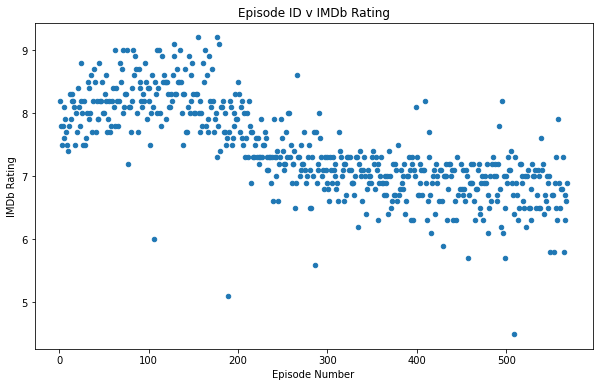

In [34]:
plot1 = episode_id_imdb.plot(kind='scatter',x= 'episode_id', y = 'imdb_rating', 
             title= 'Episode ID v IMDb Rating',
             xlabel = "Episode Number",
             ylabel = "IMDb Rating",
             figsize=(10,6));
plt.savefig('epid_v_IMDb.png')

## Correlation Between How Many Words a Character Speaks and IMDb Rating

We will now merge the IMDb ratings with our pivot table.

In [35]:
#Creating a new dataframe called 'res' which will include a new column containing IMDb ratings for every episode
res = pd.merge(pivt1, episode_id_imdb, on='episode_id', how='right')

In [36]:
#Adding 'imdb_rating' to the end of top10_chars list for ease of filtering pivot table 
top10_chars.append('imdb_rating')
top20_chars.append('imdb_rating')

We will now calculate the correlation between how many words each character speaks in an episode, and the IMDb rating.

In [37]:
corr1 = res[top10_chars].corr()
corr2 = res[top20_chars].corr()

In [38]:
corr_imdb10 = corr1.imdb_rating[:-1].sort_values(ascending = False)

In [39]:
corr_imdb20 = corr2.imdb_rating[:-1].sort_values(ascending = False)
corr_imdb20

Waylon Smithers            0.214642
C. Montgomery Burns        0.143403
Homer Simpson              0.135121
Bart Simpson               0.117104
Kent Brockman              0.097513
Seymour Skinner            0.085958
Dr. Julius Hibbert         0.046357
Apu Nahasapeemapetilon     0.045107
Edna Krabappel-Flanders    0.044314
Ned Flanders               0.030263
Chief Wiggum               0.024472
Grampa Simpson             0.001354
Lisa Simpson              -0.026969
Moe Szyslak               -0.032682
Nelson Muntz              -0.039933
Milhouse Van Houten       -0.050920
Krusty the Clown          -0.051612
Marge Simpson             -0.056161
Carl Carlson              -0.098468
Lenny Leonard             -0.109262
Name: imdb_rating, dtype: float64

When we include the top 20 characters, we find that number of words spoken by Smithers and Mr Burns have the highest positive correlation (0.21 and 0.14, respectively), whereas Lenny and Carl have the largest negative correlation (although modest at around -0.1).

The folowing code will create lists of colors for bar graphs, where red will indicate a negatvie correlation, and green will indicate a positive correlation.

In [40]:
color_10 = []

for value in corr_imdb10:
    if value >= 0:
        color_10.append('green')
    else:
        color_10.append('red')                

In [41]:
color_20 = []

for value in corr_imdb20:
    if value >= 0:
        color_20.append('green')
    else:
        color_20.append('red')                

Text(0.5, 1.0, 'Correlation Between Character Word Count and IMDb Rating')

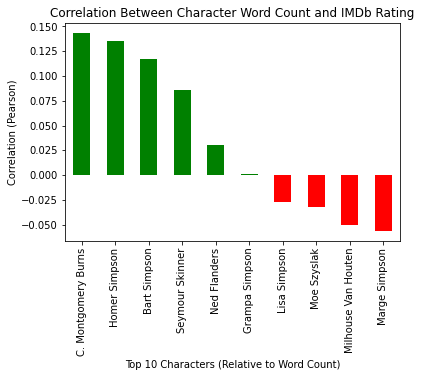

In [42]:
# create the bar plot
ax = corr_imdb10.plot(kind = 'bar', color = color_10)
# rotate xtick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# set the y-axis label
ax.set_ylabel("Correlation (Pearson)")
# set the x-axis label
ax.set_xlabel("Top 10 Characters (Relative to Word Count)")
# set the title
ax.set_title("Correlation Between Character Word Count and IMDb Rating")

Text(0.5, 1.0, 'Correlation Between Character Word Count and IMDb Rating')

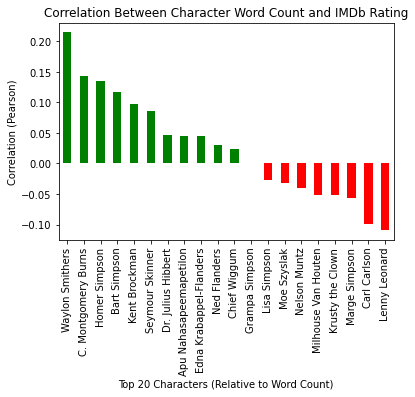

In [43]:
# create the bar plot
ax = corr_imdb20.plot(kind = 'bar', color = color_20)
# rotate xtick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# set the y-axis label
ax.set_ylabel("Correlation (Pearson)")
# set the x-axis label
ax.set_xlabel("Top 20 Characters (Relative to Word Count)")
# set the title
ax.set_title("Correlation Between Character Word Count and IMDb Rating")

We will now look at how frequently Smithers, Homer, Marge and Lenny have featured in episodes as the series has developed.

In [44]:
res[['episode_id','Waylon Smithers','Homer Simpson','Marge Simpson','Lenny Leonard']].corr()[:1]

,episode_id,Waylon Smithers,Homer Simpson,Marge Simpson,Lenny Leonard
episode_id,1.0,-0.161558,-0.118691,-0.054201,0.209043


This shows that there is some negative correlation between the number of words Smithers speaks and the episode_id, as the series progresses, Smithers appears to have fewer words. Homer appears to be in a similar position (although this is less prominent). Words spoken by Marge are also negatively correlated, although the correlation is lower again, Lenny appears to have more words in later episodes compared to early episodes. 

So, it appears, at least to some extent, that by appearing more in the later, less well received episodes, it may look as though Lenny and Carl are to blame, however, it's not fair to lay the blame at Lenny and Carl's door!

## Total Word Count per Episode

The above result led me to investigate how the total number of words spoken per episode has changed.

We will calculate the correlation between the total number of words spoken in an episode and the episode_id initially.

In [125]:
res_loc[['episode_id',"totwords"]].corr()[:1]

,episode_id,totwords
episode_id,1.0,-0.334207


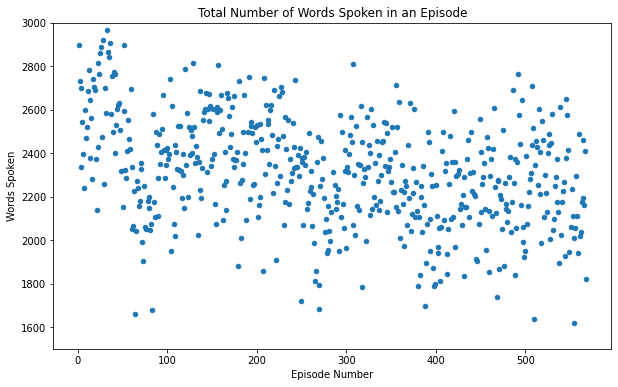

In [126]:
res_loc.plot(kind='scatter',x= 'episode_id', y = 'totwords', 
             title= 'Total Number of Words Spoken in an Episode',
             xlabel = "Episode Number",
             ylabel = "Words Spoken",
             ylim=[1500,3000],
             figsize=(10,6))
plt.savefig('epid_v_words.png')


The correlation of -0.33 shows that as the show has went on, the total number of words spoken per episode certainly looks to have decreased.

If we now compare the IMDb ratings with the total words spoken in an episode.

In [127]:
res_loc[['imdb_rating',"totwords"]].corr()[:1]

,imdb_rating,totwords
imdb_rating,1.0,0.285276


This would suggest that, the more words in an episode, the more likely it is to have a higher IMDb rating. However, this could be coming from the fact that as the series progressed, the number of words per episode decreased, and simultaneously, the IMDb ratings were decreasing.

## Correlation Between Proportion of Words a Character Speaks and IMDb Rating

We will now consider the same experiments, but using the proportion of the total words spoken by a  character in each episode.


In [45]:
# Take the picot table results (removing the IMDB score to allow us to work with word counts)
res_prop = res.iloc[:,:-1]
res_prop.set_index('episode_id')

res_prop.iloc[:,1:] = res_prop.iloc[:,1:].div(res_prop.iloc[:,1:].sum(axis=1), axis=0)



In [46]:
#Check to make sure that the sum of each row is 1 (excluding episode_id)
res_prop.iloc[:,1:].sum(axis=1)

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
559    1.0
560    1.0
561    1.0
562    1.0
563    1.0
Length: 564, dtype: float64

In [47]:
res_prop = pd.merge(res_prop, episode_id_imdb, on='episode_id', how='right')
res_prop

,episode_id,'30s Reporter,'70s Announcer,1-Year-Old Bart,1-Year-Old Homer,1-Year-Old Nelson,10 Years Younger Homer,10 Years Younger Marge,10-YEAR OLD YOKEL BOY,10-Year-Old Carl,...,Zutroy,alligator,iPod,mad Writer #1,mad Writer #2,newsstand Operator,t,teacher,Üter,imdb_rating
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.2
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.8
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.5
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.8
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.8
560,565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.3
561,566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.7
562,567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.6


In [48]:
corr1p = res_prop[top10_chars].corr()
corr2p = res_prop[top20_chars].corr()

In [49]:
corr_imdb10p = corr1p.imdb_rating[:-1].sort_values(ascending = False)

In [50]:
corr_imdb20p = corr2p.imdb_rating[:-1].sort_values(ascending = False)
corr_imdb20p

Waylon Smithers            0.209176
C. Montgomery Burns        0.131638
Kent Brockman              0.085402
Homer Simpson              0.080021
Bart Simpson               0.076582
Seymour Skinner            0.075327
Edna Krabappel-Flanders    0.041223
Dr. Julius Hibbert         0.039349
Apu Nahasapeemapetilon     0.037446
Ned Flanders               0.021819
Chief Wiggum               0.007540
Grampa Simpson            -0.013714
Moe Szyslak               -0.045695
Nelson Muntz              -0.050100
Krusty the Clown          -0.063684
Milhouse Van Houten       -0.065814
Lisa Simpson              -0.076041
Carl Carlson              -0.103020
Marge Simpson             -0.111100
Lenny Leonard             -0.122149
Name: imdb_rating, dtype: float64

When we include the top 20 characters, we find that number of words spoken by Smithers and Mr Burns have the highest positive correlation (0.21 and 0.13, respectively), whereas Lenny (and Marge) and Carl have the largest negative correlation (although modest at around -0.1).

The folowing code will create lists of colors for bar graphs, where red will indicate a negatvie correlation, and green will indicate a positive correlation.

In [51]:
color_10 = []

for value in corr_imdb10p:
    if value >= 0:
        color_10.append('green')
    else:
        color_10.append('red')                

In [52]:
color_20 = []

for value in corr_imdb20p:
    if value >= 0:
        color_20.append('green')
    else:
        color_20.append('red')                

Text(0.5, 1.0, 'Correlation Between Proportion of Total Words by a Character and IMDb Rating')

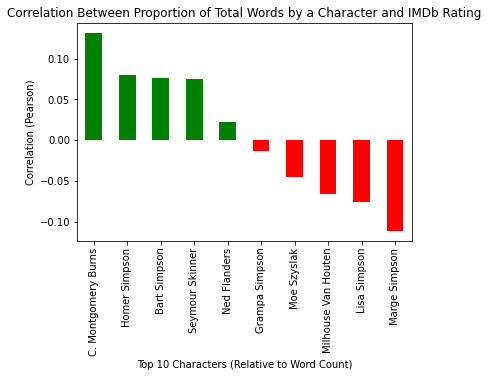

In [53]:
# create the bar plot
ax = corr_imdb10p.plot(kind = 'bar', color = color_10)
# rotate xtick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# set the y-axis label
ax.set_ylabel("Correlation (Pearson)")
# set the x-axis label
ax.set_xlabel("Top 10 Characters (Relative to Word Count)")
# set the title
ax.set_title("Correlation Between Proportion of Total Words by a Character and IMDb Rating")

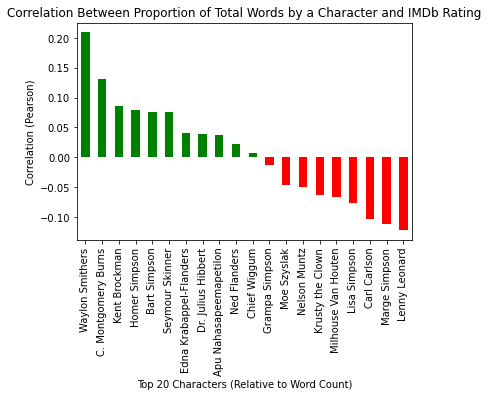

In [54]:
# create the bar plot
ax = corr_imdb20p.plot(kind = 'bar', color = color_20)
# rotate xtick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# set the y-axis label
ax.set_ylabel("Correlation (Pearson)")
# set the x-axis label
ax.set_xlabel("Top 20 Characters (Relative to Word Count)")
# set the title
ax.set_title("Correlation Between Proportion of Total Words by a Character and IMDb Rating")
ax.figsize=(7, 7)
plt.savefig('top20_propwords.png')

We will now look at how frequently Smithers, Homer, Marge and Lenny have featured in episodes as the series has developed.

In [55]:
res_prop[['episode_id','Waylon Smithers','Homer Simpson','Marge Simpson','Lenny Leonard']].corr()[:1]

,episode_id,Waylon Smithers,Homer Simpson,Marge Simpson,Lenny Leonard
episode_id,1.0,-0.151909,-0.049576,0.004978,0.221545


This shows that there is some negative correlation between the number of words Smithers speaks and the episode_id, as the series progresses, Smithers appears to have fewer words. Homer appears to be in a similar position (although this is less prominent). Words spoken by Marge are also negatively correlated, although the correlation is lower again, Lenny appears to have more words in later episodes compared to early episodes. 

So, it appears, at least to some extent, that by appearing more in the later, less well received episodes, it may look as though Lenny and Carl are to blame, however, it's not fair to lay the blame at Lenny and Carl's door!


# Correlation Between Location of Dialogue and IMDb Rating

Now, we will focus our analysis on whether there is any link between the locations dialogue is being spoken in with the IMDb rating of that episode.

We will now make a pivot table, showing the total number of words spoken in each location each episode.

In [56]:
pivt_loc =pd.pivot_table(df[['episode_id','raw_location_text','word_count_check']], 
                      index = 'episode_id', columns = 'raw_location_text', values = 'word_count_check', 
                      aggfunc = 'sum').fillna(0)
pivt_loc

raw_location_text,"""RUB A DUB DUB, THREE MEN SELLING TUBS""","$100,000 PYRAMID SET (MOVED FROM ABOVE)","$100,000 Pyramid Set",'30'S-STYLE SHOW-BUSINESS RESTAURANT,'40s Building,'50S NEW YORK NIGHT CLUB,'ZERZ,"(""SHUTTERS""-TYPE) HOTEL",(WILKES-JOHN) HOUSE,"10,000 FEET OVER THE GULF OF MEXICO",...,Zip Zap and 'Za Pizza Arcade,eye Caramba Examination Room,gut Check With Homer Simpson Soundstage,homer's Apartment,mistress-style Apartment,small Shed,the Lucky Stiff Funeral Home,tommy Hillclimber Camping Store,top Chef Kitchen,“I Can't Believe It's a Law Firm!”
episode_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We now want to do some checks to see if this seems reasonable

We can find the total words spoken for the first and last  5 episodes in our dataset

In [57]:
pivt_loc.sum(axis=1) 

episode_id
1      2898.0
2      2730.0
3      2337.0
4      2699.0
5      2541.0
        ...  
564    2460.0
565    2192.0
566    2162.0
567    2410.0
568    1819.0
Length: 564, dtype: float64

We can see that in the first 5 episodes we have around 2,500 words per episode, with slightly fewer words being spoken in the final 5 episodes. 

In [58]:
pivt_loc['Simpson Home']

episode_id
1      1156.0
2       475.0
3       224.0
4        72.0
5       637.0
        ...  
564     392.0
565     465.0
566      99.0
567      56.0
568     363.0
Name: Simpson Home, Length: 564, dtype: float64

In [59]:
pivt_loc['Springfield Elementary School']

episode_id
1        0.0
2      514.0
3       94.0
4        0.0
5        0.0
       ...  
564      0.0
565      0.0
566      0.0
567      0.0
568      5.0
Name: Springfield Elementary School, Length: 564, dtype: float64

The results for the Simpson's house and the school seem reasonable here, where the house features in all episodes, but the school only features in 3 out of 10. 

We will limit our analysis to the 5, 10 and 20 locations where the most words were spoken across the whole show.

In [60]:
N = 5
top5_loc = get_top_loc(df,N)
top5_loc

['Simpson Home',
 'Springfield Elementary School',
 "Moe's Tavern",
 'Springfield Nuclear Power Plant',
 'Kwik-E-Mart']

In [61]:
N = 10
top10_loc = get_top_loc(df,N)
top10_loc

['Simpson Home',
 'Springfield Elementary School',
 "Moe's Tavern",
 'Springfield Nuclear Power Plant',
 'Kwik-E-Mart',
 'First Church of Springfield',
 'Simpson Living Room',
 'Springfield Street',
 'Springfield',
 'Simpson Car']

In [62]:
N = 20
top20_loc = get_top_loc(df,N)
top20_loc

['Simpson Home',
 'Springfield Elementary School',
 "Moe's Tavern",
 'Springfield Nuclear Power Plant',
 'Kwik-E-Mart',
 'First Church of Springfield',
 'Simpson Living Room',
 'Springfield Street',
 'Springfield',
 'Simpson Car',
 'Flanders Home',
 'Street',
 'Springfield Town Hall',
 'Springfield Retirement Castle',
 'Burns Manor',
 'Springfield Mall',
 'Simpson Kitchen',
 'Courtroom',
 "Bart's Treehouse",
 "Bart's Bedroom"]

As before, we will now add the imdb rating as a final column to our pivot table.

In [63]:
episode_id_imdb = df[['episode_id', 'imdb_rating']].drop_duplicates(ignore_index = True)
episode_id_imdb.set_index('episode_id')

,imdb_rating
episode_id,
1,8.2
2,7.8
3,7.5
4,7.8
5,8.1
...,...
564,5.8
565,6.3
566,6.7


We will now merge the IMDb ratings with our pivot table.

In [64]:
res_loc = pd.merge(pivt_loc, episode_id_imdb, on='episode_id', how='inner')


In [65]:
#Adding 'imdb_rating' to the end of top10_loc list for ease of filtering pivot table 
top5_loc.append('imdb_rating')
top10_loc.append('imdb_rating')
top20_loc.append('imdb_rating')

In [66]:
# We will continue to use 'episode_id' as the index of our table
res_loc.set_index('episode_id')

,"""RUB A DUB DUB, THREE MEN SELLING TUBS""","$100,000 PYRAMID SET (MOVED FROM ABOVE)","$100,000 Pyramid Set",'30'S-STYLE SHOW-BUSINESS RESTAURANT,'40s Building,'50S NEW YORK NIGHT CLUB,'ZERZ,"(""SHUTTERS""-TYPE) HOTEL",(WILKES-JOHN) HOUSE,"10,000 FEET OVER THE GULF OF MEXICO",...,eye Caramba Examination Room,gut Check With Homer Simpson Soundstage,homer's Apartment,mistress-style Apartment,small Shed,the Lucky Stiff Funeral Home,tommy Hillclimber Camping Store,top Chef Kitchen,“I Can't Believe It's a Law Firm!”,imdb_rating
episode_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.8
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.5
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.8
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.8
565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.3
566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.7


We will now calculate the correlation between where dialogue takes place in an episode, and the IMDb rating.

In [67]:
corr1 = res_loc[top5_loc].corr()
corr2 = res_loc[top10_loc].corr()
corr3 = res_loc[top20_loc].corr()


In [68]:
corr_imdb5 = corr1.imdb_rating[:-1].sort_values(ascending = False)
corr_imdb5

Springfield Nuclear Power Plant    0.190906
Simpson Home                       0.178893
Kwik-E-Mart                        0.057418
Springfield Elementary School     -0.020191
Moe's Tavern                      -0.025386
Name: imdb_rating, dtype: float64

From the above, we can see that the highest positive rating of correlation between words spoken and IMDb rating is for the power plant which has a correlation of 0.19.

In [69]:
corr_imdb10 = corr2.imdb_rating[:-1].sort_values(ascending = False)
corr_imdb10

Springfield Nuclear Power Plant    0.190906
Simpson Home                       0.178893
Simpson Living Room                0.116171
Kwik-E-Mart                        0.057418
Simpson Car                        0.024577
Springfield Elementary School     -0.020191
Moe's Tavern                      -0.025386
First Church of Springfield       -0.034884
Springfield Street                -0.140764
Springfield                       -0.158425
Name: imdb_rating, dtype: float64

The above illustrates a potential problem with our analysis. It is not clear how the data states the location, for example, we have several locations within the Simpsons house (Simpson Home and Simpson Living Room), similarly, several locations seem to describe generic locations within Springfield (Springfield Street and Springfield).

However, the largest positive correlations are for the Power Plant and locations within the Simpson's home. Highest negative correlation is for the generic Springfield locations. 

In [70]:
corr_imdb20 = corr3.imdb_rating[:-1].sort_values(ascending = False)
corr_imdb20

Springfield Nuclear Power Plant    0.190906
Simpson Home                       0.178893
Street                             0.154419
Simpson Kitchen                    0.139958
Simpson Living Room                0.116171
Kwik-E-Mart                        0.057418
Springfield Town Hall              0.056679
Simpson Car                        0.024577
Burns Manor                        0.024211
Bart's Treehouse                   0.015137
Flanders Home                      0.012316
Courtroom                          0.011559
Bart's Bedroom                    -0.008951
Springfield Retirement Castle     -0.012093
Springfield Elementary School     -0.020191
Moe's Tavern                      -0.025386
First Church of Springfield       -0.034884
Springfield Mall                  -0.039240
Springfield Street                -0.140764
Springfield                       -0.158425
Name: imdb_rating, dtype: float64

By looking at the top 20 locations, we find even more locations that could be classes as the Simpson's home (Simpson Home, Simpson Kitchen, Simpson Living Room, Bart's Bedroom). One possible improvement could be to reclassify these locations all as Simpson Home.

The folowing code will create lists of colors for bar graphs, where red will indicate a negative correlation, and green will indicate a positive correlation.

In [71]:
color_5= []

for value in corr_imdb5:
    if value >= 0:
        color_5.append('green')
    else:
        color_5.append('red')   

In [72]:
color_10 = []

for value in corr_imdb10:
    if value >= 0:
        color_10.append('green')
    else:
        color_10.append('red')                

In [73]:
color_20 = []

for value in corr_imdb20:
    if value >= 0:
        color_20.append('green')
    else:
        color_20.append('red')                

Text(0.5, 1.0, 'Correlation Between Location Word Count and IMDb Rating')

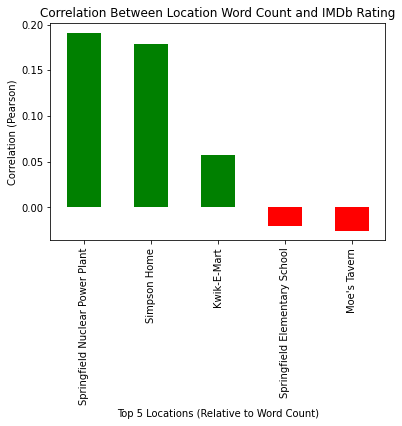

In [74]:
# create the bar plot
ax = corr_imdb5.plot(kind = 'bar', color = color_5)
# rotate xtick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# set the y-axis label
ax.set_ylabel("Correlation (Pearson)")
# set the x-axis label
ax.set_xlabel("Top 5 Locations (Relative to Word Count)")
# set the title
ax.set_title("Correlation Between Location Word Count and IMDb Rating")

Text(0.5, 1.0, 'Correlation Between Location Word Count and IMDb Rating')

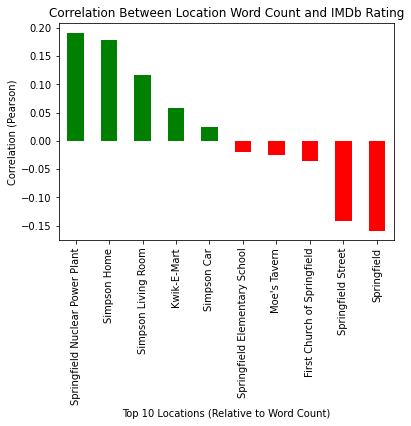

In [75]:
# create the bar plot
ax = corr_imdb10.plot(kind = 'bar', color = color_10)
# rotate xtick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# set the y-axis label
ax.set_ylabel("Correlation (Pearson)")
# set the x-axis label
ax.set_xlabel("Top 10 Locations (Relative to Word Count)")
# set the title
ax.set_title("Correlation Between Location Word Count and IMDb Rating")

Text(0.5, 1.0, 'Correlation Between Location Word Count and IMDb Rating')

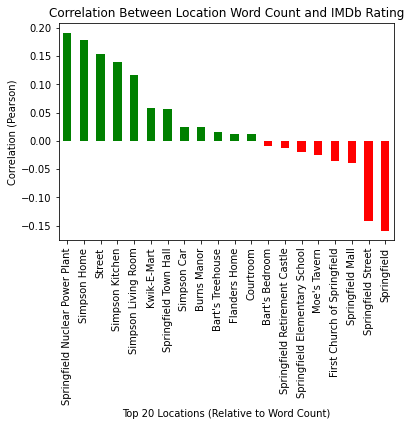

In [76]:
# create the bar plot
ax = corr_imdb20.plot(kind = 'bar', color = color_20)
# rotate xtick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# set the y-axis label
ax.set_ylabel("Correlation (Pearson)")
# set the x-axis label
ax.set_xlabel("Top 20 Locations (Relative to Word Count)")
# set the title
ax.set_title("Correlation Between Location Word Count and IMDb Rating")

We will now look at how frequently the Power Plant, Kwik-E-Mart  and Springfield have featured in episodes as the series has developed.

In [77]:
res_loc[['episode_id', 
     'Springfield Nuclear Power Plant',
     'Kwik-E-Mart',
     'Springfield Street',
     'Springfield']].corr()[:1]

,episode_id,Springfield Nuclear Power Plant,Kwik-E-Mart,Springfield Street,Springfield
episode_id,1.0,-0.092344,-0.059303,0.179515,0.147272


This shows that there is some negative correlation between the number of words spoken in the powerplant or Kwik-E-Mart and episode_id, whereas 'Springfield Street' and 'Springfield' seem to be used more often as the series goes on.

So, it appears, at least to some extent, that by appearing more in the later episodes, 'Springfield' and 'Springfield Street' are getting a bad name due to the post golden period episodes.

## Correlation Between Proportion of Words in a Location and IMDb Rating

We will now consider the same experiments, but using the proportion of the total words spoken in a locationin each episode.


In [78]:
# Take the picot table results (removing the IMDB score to allow us to work with word counts)
res_loc_prop = res_loc.iloc[:,:-1]
res_loc_prop.set_index('episode_id')

res_loc_prop.iloc[:,1:] = res_loc_prop.iloc[:,1:].div(res_loc_prop.iloc[:,1:].sum(axis=1), axis=0)



In [79]:
#Check to make sure that the sum of each row is 1 (excluding episode_id)
res_loc_prop.iloc[:,1:].sum(axis=1)

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
559    1.0
560    1.0
561    1.0
562    1.0
563    1.0
Length: 564, dtype: float64

In [80]:
res_loc_prop = pd.merge(res_loc_prop, episode_id_imdb, on='episode_id', how='right')
res_loc_prop

,episode_id,"""RUB A DUB DUB, THREE MEN SELLING TUBS""","$100,000 PYRAMID SET (MOVED FROM ABOVE)","$100,000 Pyramid Set",'30'S-STYLE SHOW-BUSINESS RESTAURANT,'40s Building,'50S NEW YORK NIGHT CLUB,'ZERZ,"(""SHUTTERS""-TYPE) HOTEL",(WILKES-JOHN) HOUSE,...,eye Caramba Examination Room,gut Check With Homer Simpson Soundstage,homer's Apartment,mistress-style Apartment,small Shed,the Lucky Stiff Funeral Home,tommy Hillclimber Camping Store,top Chef Kitchen,“I Can't Believe It's a Law Firm!”,imdb_rating
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.2
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.8
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.5
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.8
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.8
560,565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.3
561,566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.7
562,567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.6


In [81]:
corr1lp = res_loc_prop[top10_loc].corr()
corr2lp = res_loc_prop[top20_loc].corr()

In [82]:
corr_imdb10lp = corr1lp.imdb_rating[:-1].sort_values(ascending = False)

In [83]:
corr_imdb20lp = corr2lp.imdb_rating[:-1].sort_values(ascending = False)
corr_imdb20lp

Springfield Nuclear Power Plant    0.179967
Street                             0.150889
Simpson Kitchen                    0.137686
Simpson Home                       0.111842
Simpson Living Room                0.110155
Springfield Town Hall              0.050861
Kwik-E-Mart                        0.048267
Burns Manor                        0.022215
Simpson Car                        0.012425
Bart's Treehouse                   0.009245
Flanders Home                      0.006699
Courtroom                          0.005738
Bart's Bedroom                    -0.016050
Springfield Retirement Castle     -0.023541
Moe's Tavern                      -0.036798
Springfield Elementary School     -0.037571
First Church of Springfield       -0.040502
Springfield Mall                  -0.050365
Springfield Street                -0.143736
Springfield                       -0.172330
Name: imdb_rating, dtype: float64

When we include the top 20 characters, we find that number of words spoken by Smithers and Mr Burns have the highest positive correlation (0.21 and 0.13, respectively), whereas Lenny (and Marge) and Carl have the largest negative correlation (although modest at around -0.1).

The folowing code will create lists of colors for bar graphs, where red will indicate a negatvie correlation, and green will indicate a positive correlation.

In [84]:
color_10 = []

for value in corr_imdb10lp:
    if value >= 0:
        color_10.append('green')
    else:
        color_10.append('red')                

In [85]:
color_20 = []

for value in corr_imdb20lp:
    if value >= 0:
        color_20.append('green')
    else:
        color_20.append('red')                

Text(0.5, 1.0, 'Correlation Between Proportion of Total Words in a Location and IMDb Rating')

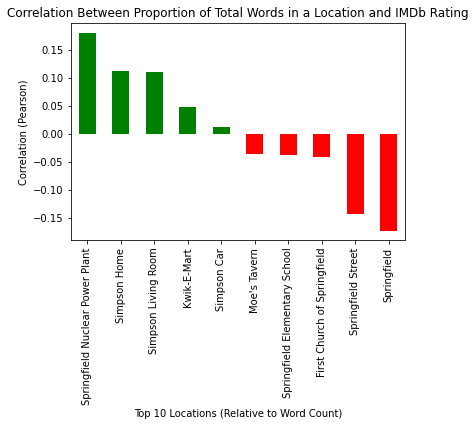

In [86]:
# create the bar plot
ax = corr_imdb10lp.plot(kind = 'bar', color = color_10)
# rotate xtick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# set the y-axis label
ax.set_ylabel("Correlation (Pearson)")
# set the x-axis label
ax.set_xlabel("Top 10 Locations (Relative to Word Count)")
# set the title
ax.set_title("Correlation Between Proportion of Total Words in a Location and IMDb Rating")

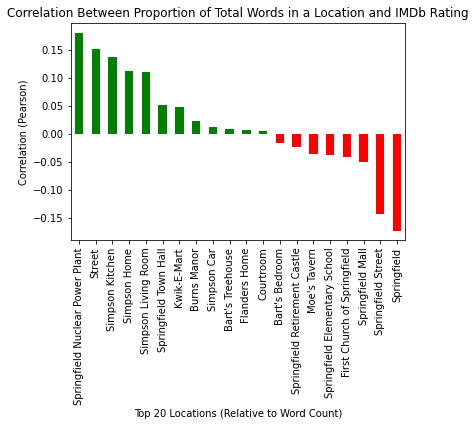

In [87]:
# create the bar plot
ax = corr_imdb20lp.plot(kind = 'bar', color = color_20)
# rotate xtick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# set the y-axis label
ax.set_ylabel("Correlation (Pearson)")
# set the x-axis label
ax.set_xlabel("Top 20 Locations (Relative to Word Count)")
# set the title
ax.set_title("Correlation Between Proportion of Total Words in a Location and IMDb Rating")
ax.figsize=(7, 7)
plt.savefig('top20_propwords.png')

We will now look at how frequently each of these locations have appeared as the show has progressed.

In [129]:
res_loc_prop[['episode_id', 
     'Springfield Nuclear Power Plant',
     'Kwik-E-Mart',
     'Springfield Street',
     'Springfield']].corr()[:1]

,episode_id,Springfield Nuclear Power Plant,Kwik-E-Mart,Springfield Street,Springfield
episode_id,1.0,-0.074581,-0.042461,0.182909,0.152061


This shows that there is some negative correlation between the number of words Smithers speaks and the episode_id, as the series progresses, Smithers appears to have fewer words. Homer appears to be in a similar position (although this is less prominent). Words spoken by Marge are also negatively correlated, although the correlation is lower again, Lenny appears to have more words in later episodes compared to early episodes. 

So, it appears, at least to some extent, that by appearing more in the later, less well received episodes, it may look as though Lenny and Carl are to blame, however, it's not fair to lay the blame at Lenny and Carl's door!


## Proportion of Dialogue Spoken in Top 5, 10 and 20 Locations

For our whole data set, we have 1,300,000 words spoken

In [89]:
tot_words = pivt_loc.sum(axis=0).sum()
tot_words

1301441.0

In [90]:
pivt_loc.sum(axis=0).sort_values(ascending = False)[:10]

raw_location_text
Simpson Home                       300509.0
Springfield Elementary School       58506.0
Moe's Tavern                        42084.0
Springfield Nuclear Power Plant     30874.0
Kwik-E-Mart                         13072.0
First Church of Springfield         12674.0
Simpson Living Room                 12109.0
Springfield Town Hall               10379.0
Springfield                          9784.0
Springfield Street                   9268.0
dtype: float64

In [91]:
total_top5_words = pivt_loc.sum(axis=0).sort_values(ascending = False)[:5].sum()
total_top5_words 

445045.0

In [92]:
total_top10_words = pivt_loc.sum(axis=0).sort_values(ascending = False)[:10].sum()
total_top10_words 

499259.0

In [93]:
total_top20_words = pivt_loc.sum(axis=0).sort_values(ascending = False)[:20].sum()
total_top20_words 

576707.0

In [94]:
total_top5_words /tot_words 

0.3419632545770419

In [95]:
total_top10_words /tot_words 

0.38362015642660713

In [96]:
total_top20_words /tot_words 

0.4431295771379571

The top 5 locations account for around 34% of all dialogue spoken. 

The top 20 locations account for around 38% of all dialogue spoken. 

The top 20 locations account for around 44% of all dialogue spoken. 

This led me to wonder whether there was a link between the IMDb score, and the more unusual the locations.

As a big fan of the show in the early years, one of the issues, in my opinion was the growing reliance on new locations (for example, visiting Japan and the UK). I wondered if there was connection between how much time was spent in the more standard locations and quality of episode.

We will now create a new column in our pivot table, to calculate the total words spoken in the top 5, 10 and 20 locations per episode.

In [97]:
#Counting the words spoken in top 5, 10 and 20 locations for each episode
Top5loc_count = pivt_loc[top5_loc[:-1]].sum(axis=1).to_list()
Top10loc_count = pivt_loc[top10_loc[:-1]].sum(axis=1).to_list()
Top20loc_count = pivt_loc[top20_loc[:-1]].sum(axis=1).to_list()

Tot_words =pivt_loc.sum(axis=1).to_list()

res_loc["top5loc_count"] = Top5loc_count
res_loc["top10loc_count"] = Top10loc_count
res_loc["top20loc_count"] = Top20loc_count

res_loc["totwords"] = Tot_words

res_loc.set_index('episode_id')

,"""RUB A DUB DUB, THREE MEN SELLING TUBS""","$100,000 PYRAMID SET (MOVED FROM ABOVE)","$100,000 Pyramid Set",'30'S-STYLE SHOW-BUSINESS RESTAURANT,'40s Building,'50S NEW YORK NIGHT CLUB,'ZERZ,"(""SHUTTERS""-TYPE) HOTEL",(WILKES-JOHN) HOUSE,"10,000 FEET OVER THE GULF OF MEXICO",...,small Shed,the Lucky Stiff Funeral Home,tommy Hillclimber Camping Store,top Chef Kitchen,“I Can't Believe It's a Law Firm!”,imdb_rating,top5loc_count,top10loc_count,top20loc_count,totwords
episode_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.2,1282.0,1282.0,1523.0,2898.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.8,989.0,1177.0,1177.0,2730.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.5,576.0,621.0,717.0,2337.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.8,441.0,755.0,951.0,2699.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.1,637.0,637.0,996.0,2541.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.8,726.0,784.0,1115.0,2460.0
565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.3,658.0,841.0,1154.0,2192.0
566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.7,1426.0,1484.0,1484.0,2162.0


I'll now create now columns showing the proportion of words in each episode spoken in the top 5, 10 and 20 locations.

In [98]:
res_loc['prop_top5'] = (res_loc["top5loc_count"] / res_loc['totwords'])
res_loc['prop_top10'] = (res_loc["top10loc_count"] / res_loc['totwords'])
res_loc['prop_top20'] = (res_loc["top20loc_count"] / res_loc['totwords'])

In [99]:
res.set_index('episode_id')

,'30s Reporter,'70s Announcer,1-Year-Old Bart,1-Year-Old Homer,1-Year-Old Nelson,10 Years Younger Homer,10 Years Younger Marge,10-YEAR OLD YOKEL BOY,10-Year-Old Carl,10-Year-Old Homer,...,Zutroy,alligator,iPod,mad Writer #1,mad Writer #2,newsstand Operator,t,teacher,Üter,imdb_rating
episode_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.8
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.5
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.8
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.8
565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.3
566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.7


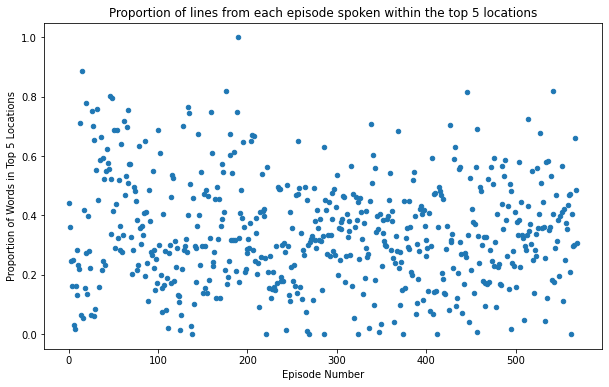

In [100]:
res_loc.plot(kind='scatter',x= 'episode_id', y = 'prop_top5', 
             title= 'Proportion of lines from each episode spoken within the top 5 locations',
             xlabel = "Episode Number",
             ylabel = "Proportion of Words in Top 5 Locations",
             figsize=(10,6));

In [101]:
#First 200 episodes, around 37% of dialogue is spoken in the top 5 locations
res_loc['prop_top5'][:200].mean()

0.37118791994799794

In [102]:
#From Episode 201 onwards, around 33% of dialogue is spoken in the top 20 locations
res_loc['prop_top5'][200:].mean()

0.3259511451432003

In [130]:
#Correlation between episode number and proportion of dialogue in that episode spoken within the top 5 locations
res_loc[['episode_id','prop_top5']].corr()[:-1]

,episode_id,prop_top5
episode_id,1.0,-0.065593


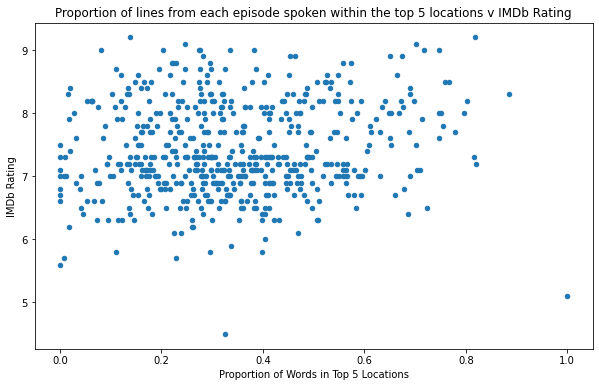

In [104]:
res_loc.plot(kind='scatter',x= 'prop_top5', y = 'imdb_rating', 
             title= 'Proportion of lines from each episode spoken within the top 5 locations v IMDb Rating',
             xlabel = "Proportion of Words in Top 5 Locations",
             ylabel = "IMDb Rating",
             figsize=(10,6));

In [105]:
#Correlation between the proportion of dialogue spoken in the top 5 locations and IMDb score
res_loc[['prop_top5','imdb_rating']].corr()[:-1]


,prop_top5,imdb_rating
prop_top5,1.0,0.13018


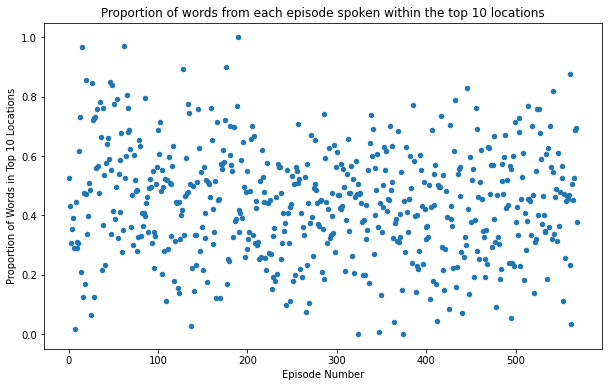

In [106]:
res_loc.plot(kind='scatter',x= 'episode_id', y = 'prop_top20', 
             title= 'Proportion of words from each episode spoken within the top 10 locations',
             xlabel = "Episode Number",
             ylabel = "Proportion of Words in Top 10 Locations",
             figsize=(10,6));
plt.savefig('epid_v_words.png')



In [107]:
#First 200 episodes, around 40% of dialogue is spoken in the top 10 locations
res_loc['prop_top10'][:200].mean()

0.40857071250095117

In [108]:
#From Episode 201 onwards, around 37% of dialogue is spoken in the top 10 locations
res_loc['prop_top10'][200:].mean()

0.3693350593120168

In [109]:
res_loc[['episode_id','prop_top10']].corr()[:-1]

,episode_id,prop_top10
episode_id,1.0,-0.051019


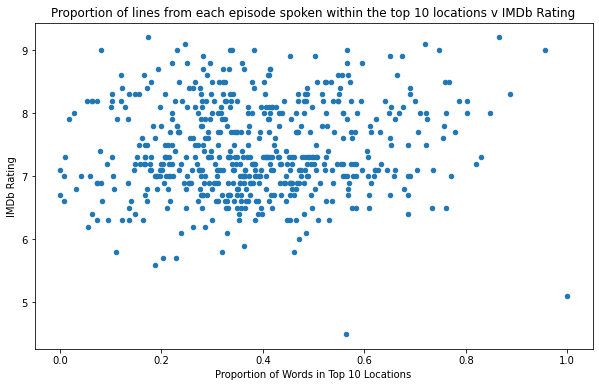

In [110]:
res_loc.plot(kind='scatter',x= 'prop_top10', y = 'imdb_rating', 
             title= 'Proportion of lines from each episode spoken within the top 10 locations v IMDb Rating',
             xlabel = "Proportion of Words in Top 10 Locations",
             ylabel = "IMDb Rating",
             figsize=(10,6));

In [111]:
#Correlation between the proportion of dialogue spoken in teh top 10 locations and IMDb score
res_loc[['prop_top10','imdb_rating']].corr()[:-1]


,prop_top10,imdb_rating
prop_top10,1.0,0.103032


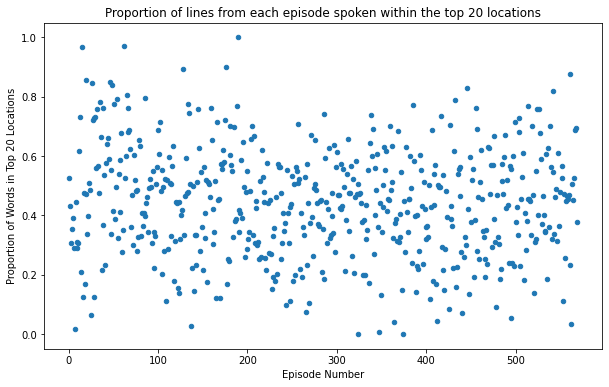

In [112]:
res_loc.plot(kind='scatter',x= 'episode_id', y = 'prop_top20', 
             title= 'Proportion of lines from each episode spoken within the top 20 locations',
             xlabel = "Episode Number",
             ylabel = "Proportion of Words in Top 20 Locations",
             figsize=(10,6));

In [113]:
#First 200 episodes, around 48% of dialogue is spoken in the top 20 locations
res_loc['prop_top20'][:200].mean()

0.4795192822526704

In [114]:
#From Episode 201 onwards, around 42% of dialogue is spoken in the top 20 locations
res_loc['prop_top20'][200:].mean()

0.4228811675502142

In [115]:
res_loc[['episode_id','prop_top20']].corr()[:-1]

,episode_id,prop_top20
episode_id,1.0,-0.09056


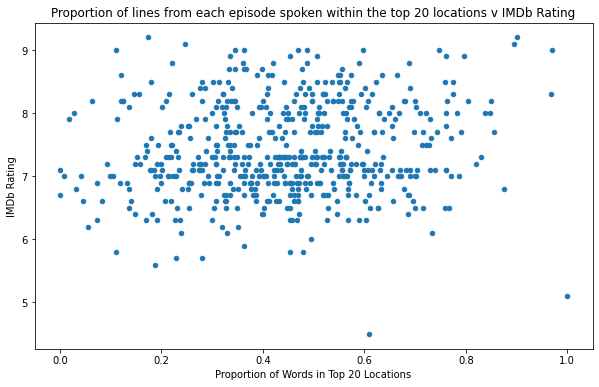

In [116]:
res_loc.plot(kind='scatter',x= 'prop_top20', y = 'imdb_rating', 
             title= 'Proportion of lines from each episode spoken within the top 20 locations v IMDb Rating',
             xlabel = "Proportion of Words in Top 20 Locations",
             ylabel = "IMDb Rating",
             figsize=(10,6));
plt.savefig('proploc20_v_imdb.png')

In [117]:
#Correlation between the proportion of dialogue spoken in the top 20 locations and IMDb score
res_loc[['prop_top20','imdb_rating']].corr()[:-1]


,prop_top20,imdb_rating
prop_top20,1.0,0.131681


From the above analysis, we found that the biggest correlation between IMDb score and location was found when we considered either the top 5 location or the top 20 locations. In both cases, we found a correlation of 0.13. Although this is hardly a groundbreaking finding, it does perhaps suggest that episodes based in the most common locations are likely to be of higher quality than those episodes set in more exotic locations. 

## Another Look at the Simpson's Home Location

I then considered whether my results would differ if I had a closer look at the Location field of the data.



I will create a list of Locations from the columns of our pivot table.

In [118]:
column_list = list(res_loc.columns)

Will will search column names for potential Locations within the Simpon's home.

In [119]:
matches = [match for match in column_list if "Simpson " in match]
matches

['Front of Simpson Home',
 'Near Simpson Car',
 'Old Simpson Farmhouse',
 'Old Simpson Home',
 'Road in Front of Simpson Farm',
 'Sidewalk In Front Of Simpson House',
 'Simpson & Son Pub',
 'Simpson Back Porch',
 'Simpson Backyard',
 'Simpson Barn',
 'Simpson Basement',
 'Simpson Bathroom',
 'Simpson Cabin',
 'Simpson Car',
 'Simpson Convertible',
 'Simpson Dining Room',
 'Simpson Driveway',
 'Simpson Farmhouse',
 'Simpson Foyer',
 'Simpson Front Door',
 'Simpson Front Porch',
 'Simpson Front Yard',
 'Simpson Garage',
 'Simpson Garden',
 'Simpson Hallway',
 'Simpson Home',
 'Simpson Hotel Room',
 'Simpson House of the Future',
 'Simpson Hut',
 'Simpson Kitchen',
 'Simpson Living Room',
 'Simpson Master Bedroom',
 'Simpson Neighborhood',
 'Simpson Piano Room',
 'Simpson Raft',
 'Simpson TV Room',
 'Simpson Tennis Court',
 'gut Check With Homer Simpson Soundstage']

I selected locations which were either inside the Simpson's house, in the garden, or immediately outside the house.

In [120]:
simpson_home_list = ['Front of Simpson Home',
 'Sidewalk In Front Of Simpson House',
 'Simpson Back Porch',
 'Simpson Backyard',
 'Simpson Basement',
 'Simpson Bathroom',
 'Simpson Dining Room',
 'Simpson Driveway',
 'Simpson Foyer',
 'Simpson Front Door',
 'Simpson Front Porch',
 'Simpson Front Yard',
 'Simpson Garage',
 'Simpson Garden',
 'Simpson Hallway',
 'Simpson Home',
 'Simpson Kitchen',
 'Simpson Living Room',
 'Simpson Master Bedroom',
 'Simpson Piano Room',
 'Simpson TV Room',
 'Simpson Tennis Court']

In [121]:
#Create a list of total words spoken in various locations within the Simpson home. 
tot_sim_house = list(res_loc[simpson_home_list].sum(axis=1))

In [122]:
res_loc["tot_house"] = tot_sim_house
res_loc['prop_tot_house'] = (res_loc["tot_house"] / res_loc['totwords'])
res_loc.set_index('episode_id')

,"""RUB A DUB DUB, THREE MEN SELLING TUBS""","$100,000 PYRAMID SET (MOVED FROM ABOVE)","$100,000 Pyramid Set",'30'S-STYLE SHOW-BUSINESS RESTAURANT,'40s Building,'50S NEW YORK NIGHT CLUB,'ZERZ,"(""SHUTTERS""-TYPE) HOTEL",(WILKES-JOHN) HOUSE,"10,000 FEET OVER THE GULF OF MEXICO",...,imdb_rating,top5loc_count,top10loc_count,top20loc_count,totwords,prop_top5,prop_top10,prop_top20,tot_house,prop_tot_house
episode_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.2,1282.0,1282.0,1523.0,2898.0,0.442374,0.442374,0.525535,1156.0,0.398896
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.8,989.0,1177.0,1177.0,2730.0,0.362271,0.431136,0.431136,770.0,0.282051
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.5,576.0,621.0,717.0,2337.0,0.246470,0.265725,0.306804,269.0,0.115105
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.8,441.0,755.0,951.0,2699.0,0.163394,0.279733,0.352353,553.0,0.204891
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.1,637.0,637.0,996.0,2541.0,0.250689,0.250689,0.391972,637.0,0.250689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.8,726.0,784.0,1115.0,2460.0,0.295122,0.318699,0.453252,474.0,0.192683
565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.3,658.0,841.0,1154.0,2192.0,0.300182,0.383668,0.526460,465.0,0.212135
566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.7,1426.0,1484.0,1484.0,2162.0,0.659574,0.686401,0.686401,99.0,0.045791


We will now calculate the correlation between the number of words spoken either in (or very close to) the Simpson's home, and the IMDb rating.

Additionally, we will consider the proprtion of words in an episode spoken with the Simpson's house.

In [123]:
res_loc[['imdb_rating','tot_house','prop_tot_house']].corr()[:1]

,imdb_rating,tot_house,prop_tot_house
imdb_rating,1.0,0.215504,0.143394


In [131]:
res_loc[['episode_id','tot_house','prop_tot_house']].corr()[:1]

,episode_id,tot_house,prop_tot_house
episode_id,1.0,-0.251157,-0.186667


Interestingly, this shows that taking the proportion of words spoken in the house (or vicinity) as opposed to simply using the total words spoken. 

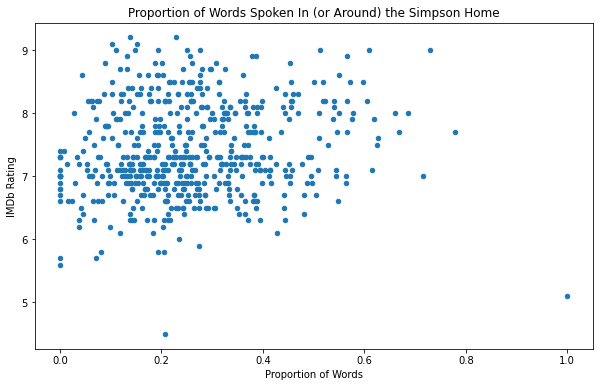

In [124]:
res_loc.plot(kind='scatter',x= 'prop_tot_house', y = 'imdb_rating', 
             title= 'Proportion of Words Spoken In (or Around) the Simpson Home',
             xlabel = "Proportion of Words",
             ylabel = "IMDb Rating",
             figsize=(10,6));

# Conclusions

We have used the IMDb rating as a proxy for the quality of Simpsons episodes. This decision assumes that user submitted IMDb scores accurately capture the quality of an episode, this is highly debateable. 

We used word counts of dialogue as a way to measure how involved a character was within an episode, and similarly used it to determine how heavily a particular location 